In [1]:
#Import Data Manupulation Library
import numpy as np
import pandas as pd

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

#Import Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Import Filter Warnings Library
import warnings
warnings.filterwarnings("ignore")

#Import Logging Library
import logging
logging.basicConfig(level=logging.INFO,
                    filename='model.log',
                    filemode='w',
                    format='%(levelname)s - %(message)s - %(asctime)s',force=True)
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,learning_curve,KFold
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE


# Multicolinearity test and treatment libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

In [2]:
#Import Data Using Pandas Function
# Load the Dataset

url = "https://raw.githubusercontent.com/ankitmandhare1111/Wine-quality-project-ML/refs/heads/main/winequality.csv"
df=pd.read_csv(url)
df.sample(frac=1)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2577,white,6.7,0.25,0.36,8.6,0.037,63.0,206.0,0.99553,3.18,0.50,9.6,5
1237,white,7.3,0.24,0.39,3.6,0.024,35.0,116.0,0.99280,3.17,0.51,10.9,5
5304,red,9.8,0.44,0.47,2.5,0.063,9.0,28.0,0.99810,3.24,0.65,10.8,6
3826,white,5.1,0.35,0.26,6.8,0.034,36.0,120.0,0.99188,3.38,0.40,11.5,6
327,white,6.4,0.34,0.23,6.3,0.039,37.0,143.0,0.99440,3.19,0.65,10.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,white,6.1,0.32,0.25,1.7,0.034,37.0,136.0,0.99200,NaN,0.50,10.8,7
3693,white,6.8,0.31,0.30,8.0,0.028,33.0,122.0,0.99164,3.13,0.63,12.6,7
4010,white,7.2,0.21,0.29,3.1,0.044,39.0,122.0,0.99143,3.00,0.60,11.3,6
4515,white,7.1,0.28,0.26,2.8,0.039,50.0,118.0,0.99080,3.06,0.59,11.2,6


In [3]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
df.drop(["type"], axis=1, inplace=True)

In [5]:
# check for null values
df.isnull().sum()

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

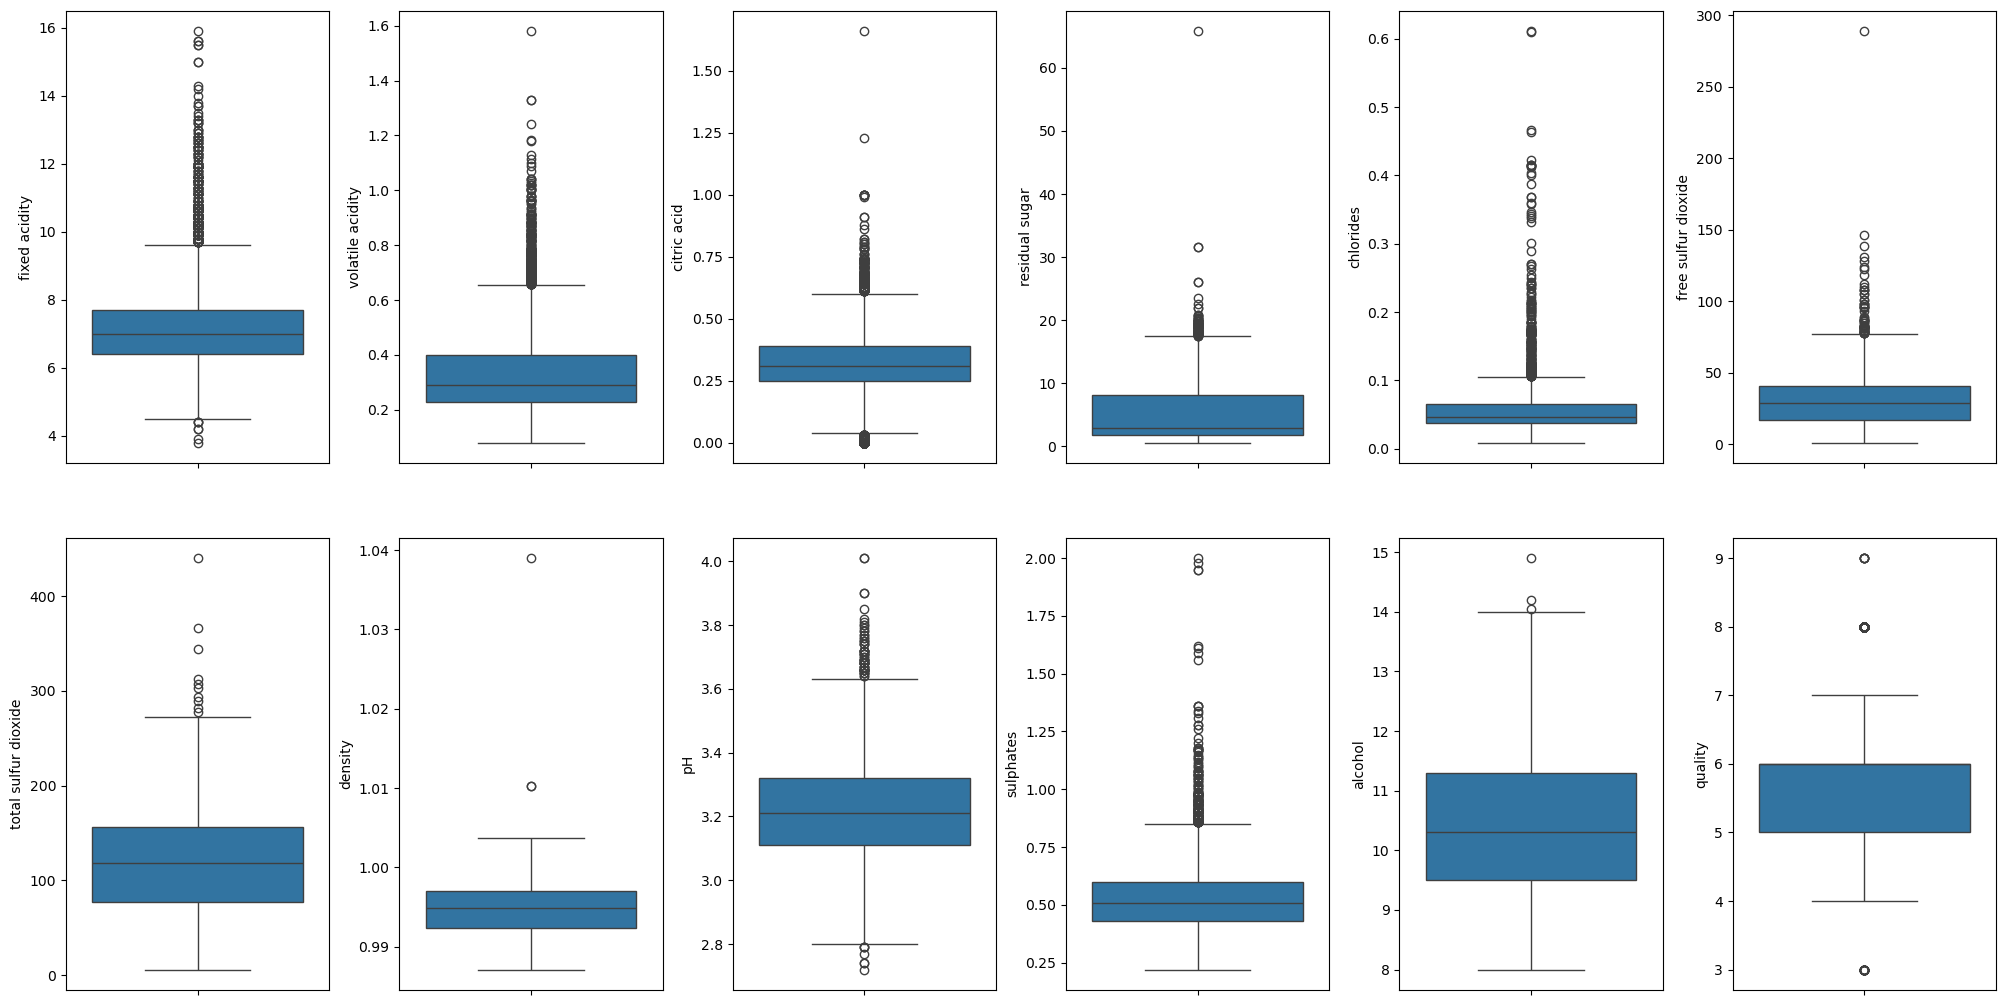

In [6]:
# create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [7]:
# check for outliers
#univariate analysis


from collections import OrderedDict

stats = []

# Descriptive Statistics

for col in df.columns:
    if df[col].dtype  !=  "object" and df[col].dtype != "bool":
        numerical_stats = OrderedDict({
            "feature" : col,
            "Minimum" : df[col].min(),
            "Mean" : df[col].mean(),
            "Median" : df[col].median(),
            "Maximum" : df[col].max(),
            "Mode" : df[col].mode()[0] if not df[col].mode().empty else None,
            "25%" : df[col].quantile(0.25),
            "75%" : df[col].quantile(0.75),
            "Standard Deviation" : df[col].std(),
            "Skwessness" : df[col].skew(),
            "Kurtosis" : df[col].kurt() 
            
        })
        stats.append(numerical_stats)

# Convert To DataFrame
report = pd.DataFrame(stats)




#caping technique

# Outliers Indentification
outlier_label = []

for col in report["feature"]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    LW = Q1 - 1.5 * IQR # Lower Whisker Line
    UW = Q3 + 1.5 * IQR # Upper Whisker Line
    outliers = df[(df[col] < LW) | (df[col] > UW)]
    
    if not outliers.empty:
        outlier_label.append("Has Outliers")
    else:
        outlier_label.append("No Outliers")

report["Oulier Comment"] = outlier_label

# Checking Report
report

,feature,Minimum,Mean,Median,Maximum,Mode,25%,75%,Standard Deviation,Skwessness,Kurtosis,Oulier Comment
0,fixed acidity,3.80000,7.216579,7.00000,15.90000,6.8000,6.40000,7.70000,1.296750,1.722805,5.057727,Has Outliers
1,volatile acidity,0.08000,0.339691,0.29000,1.58000,0.2800,0.23000,0.40000,0.164649,1.495512,2.827081,Has Outliers
2,citric acid,0.00000,0.318722,0.31000,1.66000,0.3000,0.25000,0.39000,0.145265,0.473032,2.401582,Has Outliers
3,residual sugar,0.60000,5.444326,3.00000,65.80000,2.0000,1.80000,8.10000,4.758125,1.435000,4.358134,Has Outliers
4,chlorides,0.00900,0.056042,0.04700,0.61100,0.0440,0.03800,0.06500,0.035036,5.399849,50.894874,Has Outliers
5,free sulfur dioxide,1.00000,30.525319,29.00000,289.00000,29.0000,17.00000,41.00000,17.749400,1.220066,7.906238,Has Outliers
6,total sulfur dioxide,6.00000,115.744574,118.00000,440.00000,111.0000,77.00000,156.00000,56.521855,-0.001177,-0.371664,Has Outliers
7,density,0.98711,0.994697,0.99489,1.03898,0.9972,0.99234,0.99699,0.002999,0.503602,6.606067,Has Outliers
8,pH,2.72000,3.218395,3.21000,4.01000,3.1600,3.11000,3.32000,0.160748,0.386966,0.370068,Has Outliers
9,sulphates,0.22000,0.531215,0.51000,2.00000,0.5000,0.43000,0.60000,0.148814,1.798467,8.659892,Has Outliers


In [8]:
# Replacing Outliers With Median Strategy

for col in df.select_dtypes(include= "number").columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # identify outliers
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    outlier_count = outliers.sum()
    
    if outlier_count > 0 :
        replacement = df[col].median()
        df.loc[outliers, col] = replacement
        print(f"Replaced {outlier_count} outliers in '{col}' with Median.")
    else:
        print(f"No Outliers found in {col}.")

Replaced 357 outliers in 'fixed acidity' with Median.
Replaced 376 outliers in 'volatile acidity' with Median.
Replaced 508 outliers in 'citric acid' with Median.
Replaced 118 outliers in 'residual sugar' with Median.
Replaced 286 outliers in 'chlorides' with Median.
Replaced 62 outliers in 'free sulfur dioxide' with Median.
Replaced 10 outliers in 'total sulfur dioxide' with Median.
Replaced 3 outliers in 'density' with Median.
Replaced 73 outliers in 'pH' with Median.
Replaced 191 outliers in 'sulphates' with Median.
Replaced 3 outliers in 'alcohol' with Median.
Replaced 228 outliers in 'quality' with Median.


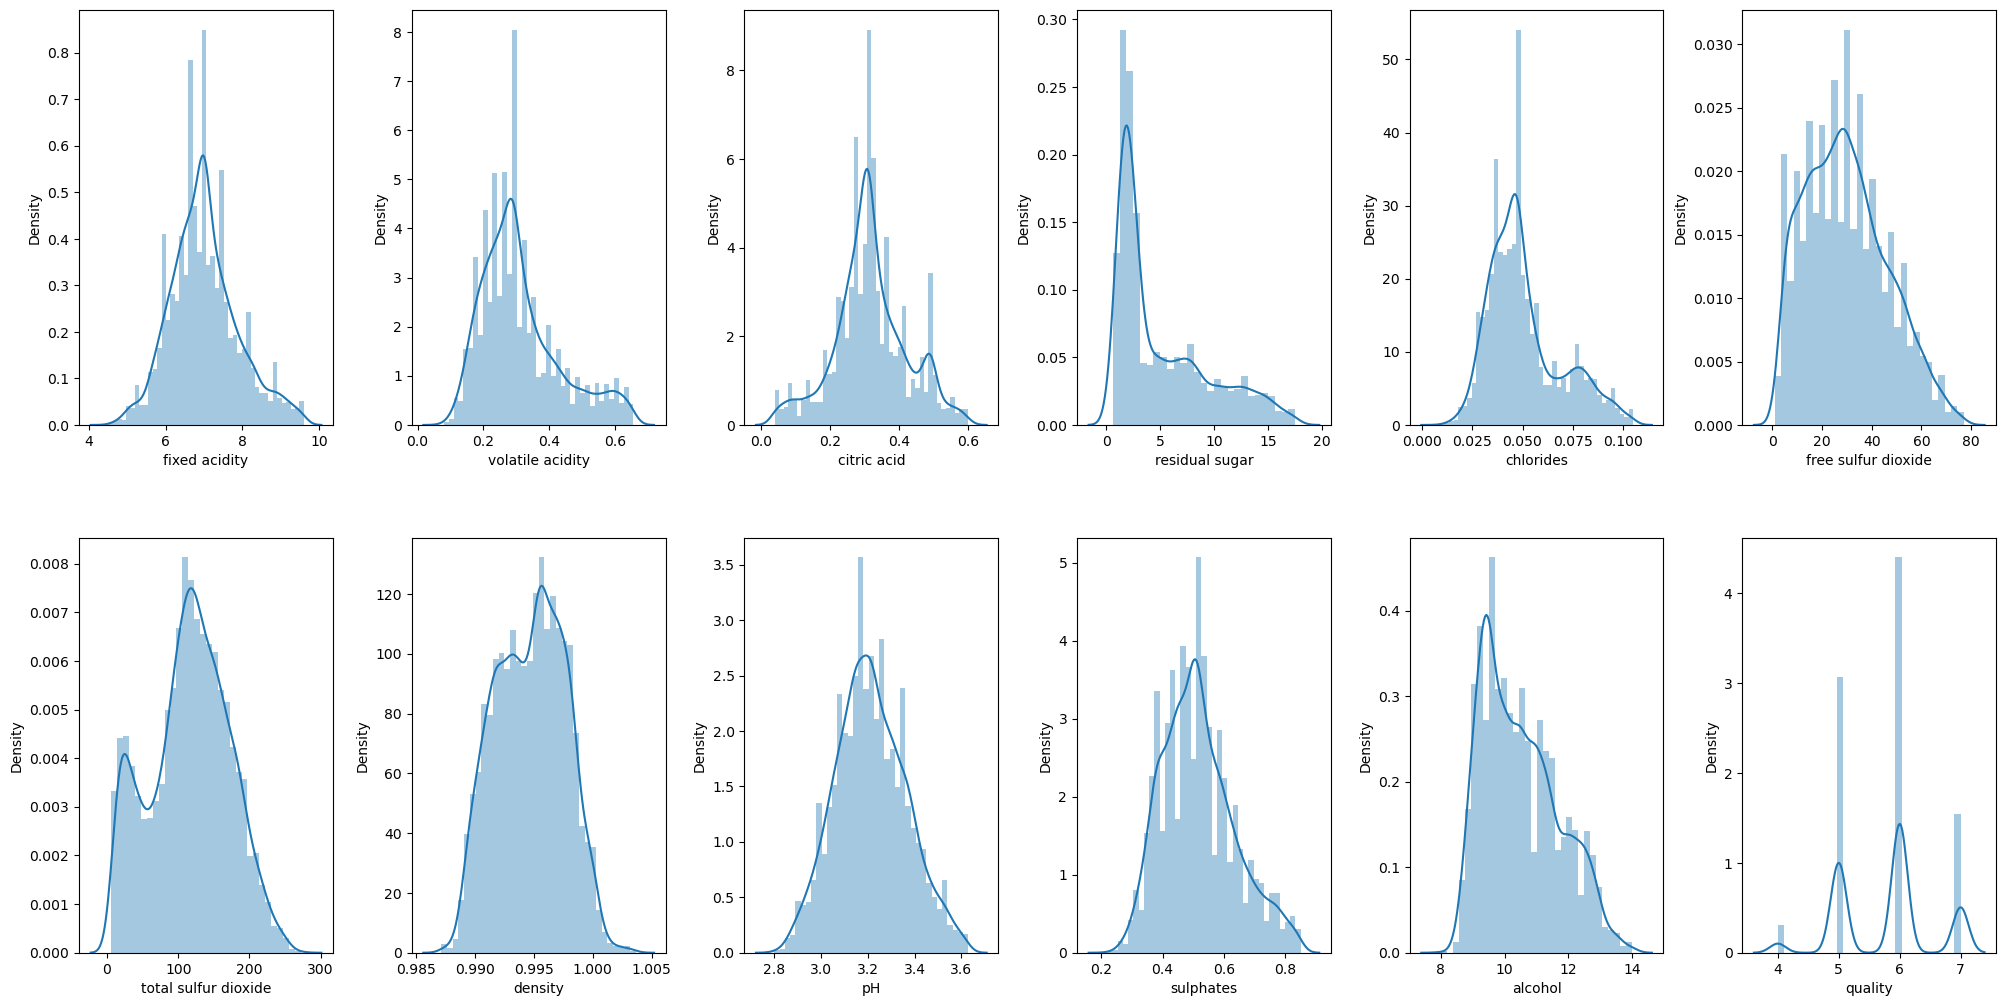

In [9]:
# create sub plot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

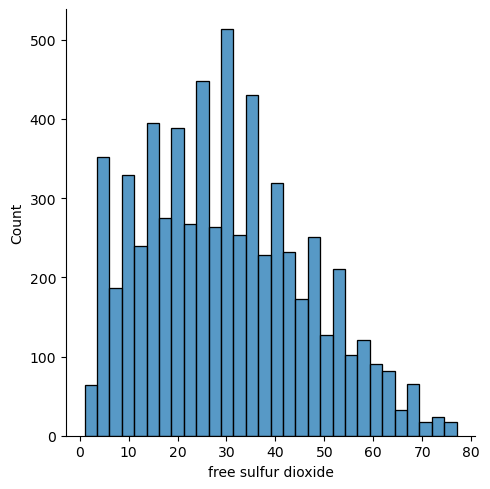

In [10]:
sns.displot (df['free sulfur dioxide'])

In [11]:

#vif

# Multicollinearity Check


from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

def calculate_vif(dataset):
    # Drop columns with all NaNs and reset index
    dataset = dataset.replace([np.inf, -np.inf], np.nan).dropna()
    
    # Optional: Reset index if rows are dropped
    dataset = dataset.reset_index(drop=True)

    vif = pd.DataFrame()
    vif['features'] = dataset.columns
    vif['VIF_Values'] = [
        variance_inflation_factor(dataset.values, i)
        for i in range(dataset.shape[1])
    ]
    vif['VIF_Values'] = round(vif['VIF_Values'], 2)
    vif = vif.sort_values(by='VIF_Values', ascending=False)
    return vif
# Calculate VIF
calculate_vif(df.drop(["quality"], axis=1))

,features,VIF_Values
7,density,933.88
8,pH,598.50
10,alcohol,116.04
0,fixed acidity,83.13
9,sulphates,24.59
4,chlorides,16.91
6,total sulfur dioxide,13.98
2,citric acid,11.44
1,volatile acidity,10.20
5,free sulfur dioxide,9.46


In [12]:
df.drop(["density", "pH","alcohol", "fixed acidity", "sulphates" ], axis=1, inplace=True)

In [13]:
#df['volatile acidity'].fillna(df['volatile acidity'].median(), inplace=True)
#df['citric acid'].fillna(df['citric acid'].median(), inplace=True)
#df['residual sugar'].fillna(df['residual sugar'].median(), inplace=True)
#df['chlorides'].fillna(df['chlorides'].median(), inplace=True)

In [14]:
# Replace missing values in the 'volatile acidity' column with its median
df['volatile acidity'].fillna(df['volatile acidity'].median(), inplace=True)

# Replace missing values in the 'citric acid' column with its median
df['citric acid'].fillna(df['citric acid'].median(), inplace=True)

# Replace missing values in the 'residual sugar' column with its median
df['residual sugar'].fillna(df['residual sugar'].median(), inplace=True)

# Replace missing values in the 'chlorides' column with its median
df['chlorides'].fillna(df['chlorides'].median(), inplace=True)


In [15]:
# check for null values
df.isnull().sum()

volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
quality                 0
dtype: int64

In [16]:
# Using PCA Concept
# Step1 : Standard the Data

scalerRS = RobustScaler()

X_train = scalerRS.fit_transform(df)

for i in range (1, df.shape[1] + 1):
    pca = PCA(n_components=i)
    pca.fit(X_train)
    evr = np.cumsum(pca.explained_variance_ratio_)
    if evr[i - 1] >= 0.90:
        pcs = i
        break

print("Explained Variance Ratio : ", evr)
print("Number of Components selected: ", pcs)

# Step 3 : Apply PCA

pca= PCA(n_components=pcs)
pca_data = pca.fit_transform(X_train)

# Step 4 :  Create DataFrame

pca_columns = [f"PC {j+1}" for j in range(pcs)]
pca_df = pd.DataFrame(pca_data, columns= pca_columns)

# Step 5 : Join Target Columns with PCA :
pca_df = pca_df.join(df["quality"], how = "left")
pca_df  
  
#  : Determine Number of Components to retain 90% variance

Explained Variance Ratio :  [0.35090336 0.53498505 0.69821826 0.80626096 0.90304382]
Number of Components selected:  5


,PC 1,PC 2,PC 3,PC 4,PC 5,quality
0,-0.847459,0.097485,0.088191,0.023017,-0.078178,6
1,0.166618,0.570153,-0.252672,-0.178605,-0.143755,6
2,-0.320854,0.577028,0.351252,0.174565,0.066700,6
3,-0.984256,-0.512101,0.407463,0.304513,0.732202,6
4,-0.984256,-0.512101,0.407463,0.304513,0.732202,6
...,...,...,...,...,...,...
6492,3.091805,-1.704563,-0.068275,0.427194,0.244788,5
6493,1.887526,-1.189541,-0.970303,0.894720,-0.259424,6
6494,2.228157,-0.815495,-0.637550,0.791697,0.303839,6
6495,2.815063,-1.531803,-0.111138,0.482958,-0.526445,5


In [17]:
# Model Building

def train_and_test_split(data, tcol, testSize=0.3, randomState=3):
    X = data.drop(tcol,axis=1)
    y = data[tcol]
    return train_test_split(X,y,test_size = testSize,random_state=randomState)

def model_builder(model_name, model, data, t_col):
    X_train, X_test, y_train, y_test = train_and_test_split(data,t_col)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    result = [model_name, r2]
    return result

model_builder(model_name='Decision Tree',model=DecisionTreeRegressor(),data=pca_df,t_col='quality')

['Decision Tree', 0.9300527117804165]

In [18]:
def multiple_models(data, t_col):
    col_names=['Model Name','r2_score']
    result = pd.DataFrame(columns = col_names)
    result.loc[len(result)] = model_builder('Decision Tree',DecisionTreeRegressor(),data,t_col)
    result.loc[len(result)] = model_builder('ADA Boost',AdaBoostRegressor(),data,t_col)
    return result.sort_values(by = 'r2_score', ascending=False)

multiple_models(pca_df, 'quality')

,Model Name,r2_score
0,Decision Tree,0.93437
1,ADA Boost,0.84970


In [1]:
from sklearn.model_selection import KFold, cross_val_score

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(RF, X, y, cv=kf, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Average CV Accuracy:", np.mean(scores))

NameError: name 'RF' is not defined